**Load the train and test data and put them in a dataframe**

In [1]:
import pandas as pd

filename_train = '/Users/admin/Downloads/final_project_data/pp5i_train.gr.csv'
df_train = pd.read_csv(filename_train)

filename_test = '/Users/admin/Downloads/final_project_data/pp5i_test.gr.csv'
df_test = pd.read_csv(filename_test)

# print(dataframe.shape)

df_train

,SNO,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,A28102_at,30,46,31,31,26,28,35,29,21,...,35,49,31,51,71,68,77,56,41,38
1,AB000114_at,22,31,19,16,26,24,29,20,23,...,38,30,22,24,19,21,22,25,21,17
2,AB000115_at,29,70,12,11,14,13,14,18,10,...,20,205,16,61,62,35,30,65,32,25
3,AB000220_at,76,208,244,39,85,23,634,159,50,...,55,203,152,53,28,30,31,31,27,16
4,AB000409_at,167,211,179,119,161,166,228,267,260,...,137,180,107,147,170,131,132,158,164,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,X83863_at,116,123,142,134,153,152,139,213,193,...,117,203,136,118,234,297,267,290,255,397
7066,Z17240_at,44,43,44,38,42,46,46,52,32,...,30,37,39,14,47,39,42,36,44,38
7067,L49218_f_at,6,9,10,9,7,7,10,0,5,...,4,8,10,1,1,1,6,6,1,7
7068,M71243_f_at,30,31,28,21,26,29,32,57,34,...,27,26,22,11,27,27,30,21,33,24


**Drop the SNO and Gene names temporarily**

In [2]:
df_train_edited = df_train.drop(columns='SNO')
df_train_edited 

,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
0,30,46,31,31,26,28,35,29,21,22,...,35,49,31,51,71,68,77,56,41,38
1,22,31,19,16,26,24,29,20,23,22,...,38,30,22,24,19,21,22,25,21,17
2,29,70,12,11,14,13,14,18,10,-3,...,20,205,16,61,62,35,30,65,32,25
3,76,208,244,39,85,23,634,159,50,23,...,55,203,152,53,28,30,31,31,27,16
4,167,211,179,119,161,166,228,267,260,234,...,137,180,107,147,170,131,132,158,164,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,116,123,142,134,153,152,139,213,193,208,...,117,203,136,118,234,297,267,290,255,397
7066,44,43,44,38,42,46,46,52,32,46,...,30,37,39,14,47,39,42,36,44,38
7067,6,9,10,9,7,7,10,0,5,-3,...,4,8,10,1,1,1,6,6,1,7
7068,30,31,28,21,26,29,32,57,34,56,...,27,26,22,11,27,27,30,21,33,24


**Step 1: Threshold both train and test data to a minimum value of 20, maximum of 16,000.**

In [3]:
df_train_thresholded = df_train_edited[(df_train_edited >= 20) & (df_train_edited <= 16000)]
df_train_thresholded

,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
0,30.0,46.0,31.0,31.0,26.0,28.0,35.0,29.0,21.0,22.0,...,35.0,49.0,31.0,51.0,71.0,68.0,77.0,56.0,41.0,38.0
1,22.0,31.0,NaN,NaN,26.0,24.0,29.0,20.0,23.0,22.0,...,38.0,30.0,22.0,24.0,NaN,21.0,22.0,25.0,21.0,NaN
2,29.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,205.0,NaN,61.0,62.0,35.0,30.0,65.0,32.0,25.0
3,76.0,208.0,244.0,39.0,85.0,23.0,634.0,159.0,50.0,23.0,...,55.0,203.0,152.0,53.0,28.0,30.0,31.0,31.0,27.0,NaN
4,167.0,211.0,179.0,119.0,161.0,166.0,228.0,267.0,260.0,234.0,...,137.0,180.0,107.0,147.0,170.0,131.0,132.0,158.0,164.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,116.0,123.0,142.0,134.0,153.0,152.0,139.0,213.0,193.0,208.0,...,117.0,203.0,136.0,118.0,234.0,297.0,267.0,290.0,255.0,397.0
7066,44.0,43.0,44.0,38.0,42.0,46.0,46.0,52.0,32.0,46.0,...,30.0,37.0,39.0,NaN,47.0,39.0,42.0,36.0,44.0,38.0
7067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7068,30.0,31.0,28.0,21.0,26.0,29.0,32.0,57.0,34.0,56.0,...,27.0,26.0,22.0,NaN,27.0,27.0,30.0,21.0,33.0,24.0


**Drop Columns in which more than half of the values are NaN**

In [4]:
half_count = len(df_train_thresholded) / 2
df_train_thresholded.dropna(thresh=half_count,axis=1)
df_train_thresholded

,1,2,3,4,5,6,7,8,9,10,...,60,61,62,63,64,65,66,67,68,69
0,30.0,46.0,31.0,31.0,26.0,28.0,35.0,29.0,21.0,22.0,...,35.0,49.0,31.0,51.0,71.0,68.0,77.0,56.0,41.0,38.0
1,22.0,31.0,NaN,NaN,26.0,24.0,29.0,20.0,23.0,22.0,...,38.0,30.0,22.0,24.0,NaN,21.0,22.0,25.0,21.0,NaN
2,29.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,205.0,NaN,61.0,62.0,35.0,30.0,65.0,32.0,25.0
3,76.0,208.0,244.0,39.0,85.0,23.0,634.0,159.0,50.0,23.0,...,55.0,203.0,152.0,53.0,28.0,30.0,31.0,31.0,27.0,NaN
4,167.0,211.0,179.0,119.0,161.0,166.0,228.0,267.0,260.0,234.0,...,137.0,180.0,107.0,147.0,170.0,131.0,132.0,158.0,164.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,116.0,123.0,142.0,134.0,153.0,152.0,139.0,213.0,193.0,208.0,...,117.0,203.0,136.0,118.0,234.0,297.0,267.0,290.0,255.0,397.0
7066,44.0,43.0,44.0,38.0,42.0,46.0,46.0,52.0,32.0,46.0,...,30.0,37.0,39.0,NaN,47.0,39.0,42.0,36.0,44.0,38.0
7067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7068,30.0,31.0,28.0,21.0,26.0,29.0,32.0,57.0,34.0,56.0,...,27.0,26.0,22.0,NaN,27.0,27.0,30.0,21.0,33.0,24.0


**Replace NaN values with the median of each column**

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
df_train_ = SimpleImputer(missing_values=np.nan, strategy='median')
df_train_ = df_train_.fit_transform(df_train_thresholded)

df_train_ = pd.DataFrame(df_train_)
df_train_

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,30.0,46.0,31.0,31.0,26.0,28.0,35.0,29.0,21.0,22.0,...,35.0,49.0,31.0,51.0,71.0,68.0,77.0,56.0,41.0,38.0
1,22.0,31.0,87.0,87.0,26.0,24.0,29.0,20.0,23.0,22.0,...,38.0,30.0,22.0,24.0,87.0,21.0,22.0,25.0,21.0,88.0
2,29.0,70.0,87.0,87.0,88.0,88.0,89.0,90.0,91.0,91.0,...,20.0,205.0,88.0,61.0,62.0,35.0,30.0,65.0,32.0,25.0
3,76.0,208.0,244.0,39.0,85.0,23.0,634.0,159.0,50.0,23.0,...,55.0,203.0,152.0,53.0,28.0,30.0,31.0,31.0,27.0,88.0
4,167.0,211.0,179.0,119.0,161.0,166.0,228.0,267.0,260.0,234.0,...,137.0,180.0,107.0,147.0,170.0,131.0,132.0,158.0,164.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7065,116.0,123.0,142.0,134.0,153.0,152.0,139.0,213.0,193.0,208.0,...,117.0,203.0,136.0,118.0,234.0,297.0,267.0,290.0,255.0,397.0
7066,44.0,43.0,44.0,38.0,42.0,46.0,46.0,52.0,32.0,46.0,...,30.0,37.0,39.0,87.0,47.0,39.0,42.0,36.0,44.0,38.0
7067,88.0,88.0,87.0,87.0,88.0,88.0,89.0,90.0,91.0,91.0,...,88.0,87.0,88.0,87.0,87.0,89.0,90.0,87.0,87.0,88.0
7068,30.0,31.0,28.0,21.0,26.0,29.0,32.0,57.0,34.0,56.0,...,27.0,26.0,22.0,87.0,27.0,27.0,30.0,21.0,33.0,24.0


**Selecting top genes by class**

Remove from train data genes with fold differences across samples less than 2. Fold difference is defined as a ratio between maximum and minimum values (Max/Min) for a given data set.

**Create a function that calculates the fold difference of each row.**

In [6]:
result= []
for i in range (len(df_train_)):
    row = pd.DataFrame(df_train_).iloc[i]
    result.append(row.max()/row.min())

# print (result)

result = pd.DataFrame(result)
result = result.iloc[:,-1]
result

0        5.600000
1        4.650000
2       10.950000
3       30.190476
4        7.897436
          ...    
7065    12.716216
7066     3.782609
7067     1.068966
7068     4.285714
7069     1.068966
Name: 0, Length: 7070, dtype: float64

**Concatenate the result dataframe and the df_train_ dataframe for easy manipulation and apply the condition** 

In [7]:
df_train_concat = pd.concat([pd.DataFrame(df_train_), result], ignore_index=True, axis=1)


#Applying the condition of dropping columns Max/Min result is less than 2

df_train_condition = df_train_concat[df_train_concat.iloc[:,-1] >= 2]

df_train_condition

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,30.0,46.0,31.0,31.0,26.0,28.0,35.0,29.0,21.0,22.0,...,49.0,31.0,51.0,71.0,68.0,77.0,56.0,41.0,38.0,5.600000
1,22.0,31.0,87.0,87.0,26.0,24.0,29.0,20.0,23.0,22.0,...,30.0,22.0,24.0,87.0,21.0,22.0,25.0,21.0,88.0,4.650000
2,29.0,70.0,87.0,87.0,88.0,88.0,89.0,90.0,91.0,91.0,...,205.0,88.0,61.0,62.0,35.0,30.0,65.0,32.0,25.0,10.950000
3,76.0,208.0,244.0,39.0,85.0,23.0,634.0,159.0,50.0,23.0,...,203.0,152.0,53.0,28.0,30.0,31.0,31.0,27.0,88.0,30.190476
4,167.0,211.0,179.0,119.0,161.0,166.0,228.0,267.0,260.0,234.0,...,180.0,107.0,147.0,170.0,131.0,132.0,158.0,164.0,172.0,7.897436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,161.0,265.0,126.0,163.0,138.0,107.0,99.0,137.0,161.0,110.0,...,238.0,718.0,374.0,198.0,364.0,251.0,315.0,248.0,285.0,14.880000
7063,34.0,98.0,21.0,87.0,29.0,88.0,57.0,90.0,23.0,91.0,...,25.0,39.0,56.0,26.0,34.0,45.0,27.0,46.0,61.0,5.050000
7065,116.0,123.0,142.0,134.0,153.0,152.0,139.0,213.0,193.0,208.0,...,203.0,136.0,118.0,234.0,297.0,267.0,290.0,255.0,397.0,12.716216
7066,44.0,43.0,44.0,38.0,42.0,46.0,46.0,52.0,32.0,46.0,...,37.0,39.0,87.0,47.0,39.0,42.0,36.0,44.0,38.0,3.782609


Drop the last column

In [8]:
df_trainn = df_train_condition.drop(columns=69)
df_trainn

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,30.0,46.0,31.0,31.0,26.0,28.0,35.0,29.0,21.0,22.0,...,35.0,49.0,31.0,51.0,71.0,68.0,77.0,56.0,41.0,38.0
1,22.0,31.0,87.0,87.0,26.0,24.0,29.0,20.0,23.0,22.0,...,38.0,30.0,22.0,24.0,87.0,21.0,22.0,25.0,21.0,88.0
2,29.0,70.0,87.0,87.0,88.0,88.0,89.0,90.0,91.0,91.0,...,20.0,205.0,88.0,61.0,62.0,35.0,30.0,65.0,32.0,25.0
3,76.0,208.0,244.0,39.0,85.0,23.0,634.0,159.0,50.0,23.0,...,55.0,203.0,152.0,53.0,28.0,30.0,31.0,31.0,27.0,88.0
4,167.0,211.0,179.0,119.0,161.0,166.0,228.0,267.0,260.0,234.0,...,137.0,180.0,107.0,147.0,170.0,131.0,132.0,158.0,164.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,161.0,265.0,126.0,163.0,138.0,107.0,99.0,137.0,161.0,110.0,...,410.0,238.0,718.0,374.0,198.0,364.0,251.0,315.0,248.0,285.0
7063,34.0,98.0,21.0,87.0,29.0,88.0,57.0,90.0,23.0,91.0,...,101.0,25.0,39.0,56.0,26.0,34.0,45.0,27.0,46.0,61.0
7065,116.0,123.0,142.0,134.0,153.0,152.0,139.0,213.0,193.0,208.0,...,117.0,203.0,136.0,118.0,234.0,297.0,267.0,290.0,255.0,397.0
7066,44.0,43.0,44.0,38.0,42.0,46.0,46.0,52.0,32.0,46.0,...,30.0,37.0,39.0,87.0,47.0,39.0,42.0,36.0,44.0,38.0


Add the variable names column

In [9]:
df_trainn_ = df_trainn.join(df_train['SNO'])
# df_trainn = df_trainn.insert(0, 'SNO', df_train.pop('SNO'))
df_trainn_

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,SNO
0,30.0,46.0,31.0,31.0,26.0,28.0,35.0,29.0,21.0,22.0,...,49.0,31.0,51.0,71.0,68.0,77.0,56.0,41.0,38.0,A28102_at
1,22.0,31.0,87.0,87.0,26.0,24.0,29.0,20.0,23.0,22.0,...,30.0,22.0,24.0,87.0,21.0,22.0,25.0,21.0,88.0,AB000114_at
2,29.0,70.0,87.0,87.0,88.0,88.0,89.0,90.0,91.0,91.0,...,205.0,88.0,61.0,62.0,35.0,30.0,65.0,32.0,25.0,AB000115_at
3,76.0,208.0,244.0,39.0,85.0,23.0,634.0,159.0,50.0,23.0,...,203.0,152.0,53.0,28.0,30.0,31.0,31.0,27.0,88.0,AB000220_at
4,167.0,211.0,179.0,119.0,161.0,166.0,228.0,267.0,260.0,234.0,...,180.0,107.0,147.0,170.0,131.0,132.0,158.0,164.0,172.0,AB000409_at
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,161.0,265.0,126.0,163.0,138.0,107.0,99.0,137.0,161.0,110.0,...,238.0,718.0,374.0,198.0,364.0,251.0,315.0,248.0,285.0,U58516_at
7063,34.0,98.0,21.0,87.0,29.0,88.0,57.0,90.0,23.0,91.0,...,25.0,39.0,56.0,26.0,34.0,45.0,27.0,46.0,61.0,X06956_at
7065,116.0,123.0,142.0,134.0,153.0,152.0,139.0,213.0,193.0,208.0,...,203.0,136.0,118.0,234.0,297.0,267.0,290.0,255.0,397.0,X83863_at
7066,44.0,43.0,44.0,38.0,42.0,46.0,46.0,52.0,32.0,46.0,...,37.0,39.0,87.0,47.0,39.0,42.0,36.0,44.0,38.0,Z17240_at


**The correlation between independent variables**

In [10]:
df_trainn_.corr()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,1.000000,0.861388,0.767744,0.808698,0.658591,0.701429,0.658454,0.583197,0.458238,0.574542,...,0.563560,0.718827,0.601658,0.638943,0.581184,0.587920,0.586980,0.551762,0.559785,0.502371
1,0.861388,1.000000,0.823629,0.884157,0.755609,0.761925,0.729306,0.562676,0.484817,0.537078,...,0.581765,0.773617,0.653276,0.654345,0.658939,0.637698,0.631834,0.606339,0.615907,0.557534
2,0.767744,0.823629,1.000000,0.797442,0.813533,0.837212,0.823245,0.519893,0.556761,0.514859,...,0.572372,0.694703,0.645061,0.611072,0.616282,0.603913,0.582940,0.585783,0.605985,0.542651
3,0.808698,0.884157,0.797442,1.000000,0.800612,0.790932,0.723233,0.539539,0.478274,0.529468,...,0.574305,0.755011,0.692377,0.646060,0.651967,0.619505,0.657293,0.577692,0.578564,0.533086
4,0.658591,0.755609,0.813533,0.800612,1.000000,0.826601,0.816624,0.563837,0.539291,0.542866,...,0.614526,0.659848,0.617748,0.609278,0.603910,0.555487,0.589166,0.572866,0.589935,0.535322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.587920,0.637698,0.603913,0.619505,0.555487,0.633018,0.550024,0.490252,0.464956,0.478150,...,0.614532,0.774879,0.680992,0.683782,0.903243,1.000000,0.879368,0.782761,0.759983,0.738008
65,0.586980,0.631834,0.582940,0.657293,0.589166,0.596210,0.508307,0.488432,0.462905,0.427520,...,0.607756,0.770860,0.726262,0.696827,0.879722,0.879368,1.000000,0.781365,0.750761,0.737457
66,0.551762,0.606339,0.585783,0.577692,0.572866,0.559052,0.559232,0.564200,0.645612,0.531086,...,0.652777,0.692533,0.642718,0.807964,0.813205,0.782761,0.781365,1.000000,0.972378,0.920806
67,0.559785,0.615907,0.605985,0.578564,0.589935,0.577383,0.583805,0.584486,0.662331,0.557099,...,0.653395,0.689065,0.641726,0.794150,0.795931,0.759983,0.750761,0.972378,1.000000,0.917248


Move the variable name column from the last to the first column

In [11]:
first_column = df_trainn_.pop('SNO')
df_trainn_.insert(0, 'SNO', first_column)
df_trainn_

,SNO,0,1,2,3,4,5,6,7,8,...,59,60,61,62,63,64,65,66,67,68
0,A28102_at,30.0,46.0,31.0,31.0,26.0,28.0,35.0,29.0,21.0,...,35.0,49.0,31.0,51.0,71.0,68.0,77.0,56.0,41.0,38.0
1,AB000114_at,22.0,31.0,87.0,87.0,26.0,24.0,29.0,20.0,23.0,...,38.0,30.0,22.0,24.0,87.0,21.0,22.0,25.0,21.0,88.0
2,AB000115_at,29.0,70.0,87.0,87.0,88.0,88.0,89.0,90.0,91.0,...,20.0,205.0,88.0,61.0,62.0,35.0,30.0,65.0,32.0,25.0
3,AB000220_at,76.0,208.0,244.0,39.0,85.0,23.0,634.0,159.0,50.0,...,55.0,203.0,152.0,53.0,28.0,30.0,31.0,31.0,27.0,88.0
4,AB000409_at,167.0,211.0,179.0,119.0,161.0,166.0,228.0,267.0,260.0,...,137.0,180.0,107.0,147.0,170.0,131.0,132.0,158.0,164.0,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,U58516_at,161.0,265.0,126.0,163.0,138.0,107.0,99.0,137.0,161.0,...,410.0,238.0,718.0,374.0,198.0,364.0,251.0,315.0,248.0,285.0
7063,X06956_at,34.0,98.0,21.0,87.0,29.0,88.0,57.0,90.0,23.0,...,101.0,25.0,39.0,56.0,26.0,34.0,45.0,27.0,46.0,61.0
7065,X83863_at,116.0,123.0,142.0,134.0,153.0,152.0,139.0,213.0,193.0,...,117.0,203.0,136.0,118.0,234.0,297.0,267.0,290.0,255.0,397.0
7066,Z17240_at,44.0,43.0,44.0,38.0,42.0,46.0,46.0,52.0,32.0,...,30.0,37.0,39.0,87.0,47.0,39.0,42.0,36.0,44.0,38.0


**Transpose each file to "genes-in-columns" format.**

In [12]:
df_train_trans = df_trainn_.transpose()
df_train_trans


,0,1,2,3,4,5,6,7,8,9,...,7056,7057,7058,7059,7060,7061,7063,7065,7066,7068
SNO,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,M71243_f_at
0,30,22,29,76,167,32,88,165,47,101,...,27,88,155,240,27,161,34,116,44,30
1,46,31,70,208,211,88,88,184,36,130,...,129,88,143,213,27,265,98,123,43,31
2,31,87,87,244,179,229,87,219,41,131,...,29,87,120,367,24,126,21,142,44,28
3,31,87,87,39,119,87,87,156,26,86,...,59,87,161,358,27,163,87,134,38,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,68,21,35,30,131,89,22,140,37,81,...,51,21,106,181,89,364,34,297,39,27
65,77,22,30,31,132,90,90,150,43,128,...,31,26,127,177,26,251,45,267,42,30
66,56,25,65,31,158,87,27,173,54,108,...,39,87,73,159,87,315,27,290,36,21
67,41,21,32,27,164,87,87,165,74,121,...,37,87,83,137,21,248,46,255,44,33


**Make the second row in the table above the header**

In [13]:
new_header = df_train_trans.iloc[0]

df_train_1 = df_train_trans[1:]

df_train_1.columns = new_header
df_train_1.rename(columns=df_train_trans.iloc[0])
df_train_1

SNO,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,M71243_f_at
0,30,22,29,76,167,32,88,165,47,101,...,27,88,155,240,27,161,34,116,44,30
1,46,31,70,208,211,88,88,184,36,130,...,129,88,143,213,27,265,98,123,43,31
2,31,87,87,244,179,229,87,219,41,131,...,29,87,120,367,24,126,21,142,44,28
3,31,87,87,39,119,87,87,156,26,86,...,59,87,161,358,27,163,87,134,38,21
4,26,26,88,85,161,34,88,206,34,140,...,97,88,119,373,41,138,29,153,42,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,68,21,35,30,131,89,22,140,37,81,...,51,21,106,181,89,364,34,297,39,27
65,77,22,30,31,132,90,90,150,43,128,...,31,26,127,177,26,251,45,267,42,30
66,56,25,65,31,158,87,27,173,54,108,...,39,87,73,159,87,315,27,290,36,21
67,41,21,32,27,164,87,87,165,74,121,...,37,87,83,137,21,248,46,255,44,33


**Add the class file as the last column in the dataframe above.**

In [14]:
class_data = '/Users/admin/Downloads/final_project_data/pp5i_train_class.csv'
df_class = pd.read_csv(class_data)

#Join the class data to the train data
df_train_1 = df_train_1.join(df_class['Class'])
df_train_1


,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,M71243_f_at,Class
0,30,22,29,76,167,32,88,165,47,101,...,88,155,240,27,161,34,116,44,30,MED
1,46,31,70,208,211,88,88,184,36,130,...,88,143,213,27,265,98,123,43,31,MED
2,31,87,87,244,179,229,87,219,41,131,...,87,120,367,24,126,21,142,44,28,MED
3,31,87,87,39,119,87,87,156,26,86,...,87,161,358,27,163,87,134,38,21,MED
4,26,26,88,85,161,34,88,206,34,140,...,88,119,373,41,138,29,153,42,26,MED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,68,21,35,30,131,89,22,140,37,81,...,21,106,181,89,364,34,297,39,27,JPA
65,77,22,30,31,132,90,90,150,43,128,...,26,127,177,26,251,45,267,42,30,JPA
66,56,25,65,31,158,87,27,173,54,108,...,87,73,159,87,315,27,290,36,21,JPA
67,41,21,32,27,164,87,87,165,74,121,...,87,83,137,21,248,46,255,44,33,JPA


**Split the independent variables (X) from dependent variable (class(y)).**

In [15]:
X_train = df_train_1.iloc[:,0:-1]
y_train = df_train_1.iloc[:,-1]

y_train

0     MED
1     MED
2     MED
3     MED
4     MED
     ... 
64    JPA
65    JPA
66    JPA
67    JPA
68    JPA
Name: Class, Length: 69, dtype: object

**Categorically encode the Class column using sklearn's LabelEncoder.**

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y_train)#.toarray()

# df_ohe = pd.DataFrame(y, columns = ["Class_"+str(int(i)) for i in range(y_train.shape[0])])

# y_df = pd.DataFrame(y)
# y_df
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1])

**Calculating the scatter coefficient. This will determine if PCA can be applied**

In [17]:
#Change the datatypes from object to float
X_train = X_train.astype(float)

def scatter_coefficient(X, normalize=True):
    corr = np.corrcoef(X, rowvar=False)
    if normalize:
        return np.linalg.det(corr) / np.trace(corr)
    else:
        return np.linalg.det(corr)

scatter_coefficient(X_train)

# def psi_index(X, normalize=True):
#     corr = np.corrcoef(X, rowvar=False)

#     #Eigenvalues and eigenvectors from the correlation matrix
#     eig_val, eig_vec = np.linalg.eig(corr)
#     idx = eig_val.argsort()[::-1]
#     eig_val = eig_val[idx]

#     if normalize:
#         p = X.shape[0]
#         return np.sum((eig_val-1)**2) / (p*(p-1))
#     else:
#         return np.sum((eig_val-1)**2)

# psi_index(X_train)

-0.0

In [18]:
#Confirm the datatype of the independent variables in the training data
X_train.dtypes

A28102_at      float64
AB000114_at    float64
AB000115_at    float64
AB000220_at    float64
AB000409_at    float64
                ...   
U58516_at      float64
X06956_at      float64
X83863_at      float64
Z17240_at      float64
M71243_f_at    float64
Length: 6777, dtype: object

**Scaling the independent variables/features using sklearn StandardScaler**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)

#According to the rule of StandardScaler the data must have a mean of 0 and a standard deviation of 1, let's confirm for sure that the data was scaled right
import numpy as np
print('Mean:', np.mean(scaled_train))
print ('Standard Deviation:', np.std(scaled_train))

Mean: -3.346721274882479e-18
Standard Deviation: 0.9999999999999999


**Let's see the scaled independent variables/feautres in a dataframe**

In [20]:
feat_cols = ['feature'+str(i) for i in range(scaled_train.shape[1])]
scaled_train = pd.DataFrame(scaled_train,columns=feat_cols)
scaled_train

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature6767,feature6768,feature6769,feature6770,feature6771,feature6772,feature6773,feature6774,feature6775,feature6776
0,-0.931793,-0.792251,-1.183159,-0.141816,-0.585909,-1.428200,0.294824,-0.524314,-0.700347,-1.127834,...,-0.943875,0.413099,1.030258,0.522603,-1.010094,-0.176032,-0.854809,-0.732447,-0.162017,-0.825529
1,-0.228168,-0.381234,-0.078487,1.217825,0.283080,0.358900,0.294824,-0.113450,-0.966129,-0.672651,...,3.481835,0.413099,0.718697,0.240397,-1.010094,0.660527,1.314637,-0.683523,-0.231025,-0.763882
2,-0.887816,2.176209,0.379548,1.588636,-0.348912,4.858563,0.244345,0.643406,-0.845319,-0.656955,...,-0.857096,0.368422,0.121539,1.850016,-1.104919,-0.457566,-1.295478,-0.550728,-0.162017,-0.948822
3,-0.887816,2.176209,0.379548,-0.522927,-1.533897,0.326988,0.244345,-0.718934,-1.207748,-1.363273,...,0.444583,0.368422,1.186038,1.755947,-1.010094,-0.159944,0.941764,-0.606642,-0.576062,-1.380348
4,-1.107699,-0.609577,0.406491,-0.049113,-0.704407,-1.364375,0.294824,0.362288,-1.014453,-0.515692,...,2.093377,0.413099,0.095575,1.912728,-0.567577,-0.361040,-1.024297,-0.473847,-0.300032,-1.072115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.739316,-0.837920,-1.021500,-0.615630,-1.296900,0.390813,-3.036756,-1.064925,-0.941967,-1.441753,...,0.097469,-2.580249,-0.241949,-0.094069,0.949626,1.456866,-0.854809,0.532597,-0.507054,-1.010468
65,1.135104,-0.792251,-1.156216,-0.605330,-1.277150,0.422725,0.395781,-0.848681,-0.796995,-0.704043,...,-0.770317,-2.356864,0.303283,-0.135877,-1.041702,0.547913,-0.481935,0.322921,-0.300032,-0.825529
66,0.211597,-0.655245,-0.213203,-0.605330,-0.763657,0.326988,-2.784364,-0.351319,-0.531213,-1.017962,...,-0.423203,0.368422,-1.098741,-0.324014,0.886409,1.062719,-1.092092,0.483672,-0.714076,-1.380348
67,-0.448051,-0.837920,-1.102330,-0.646531,-0.645158,0.326988,0.244345,-0.524314,-0.047974,-0.813915,...,-0.509982,0.368422,-0.839107,-0.553959,-1.199744,0.523782,-0.448038,0.239051,-0.162017,-0.640589


**Applying Principal Component Analysis (PCA) on the scaled data**

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_train)

# pca_data = pd.DataFrame(data = pca_data, 
#                         columns = ['PCA_1', 'PCA_2','PCA_3','PCA_4'])
# pca_data

**The next step is to find out the amount of information or variance each principal component holds after projecting
the data to a lower dimensional subspace.**

In [22]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.17891376 0.06700407 0.06072568 0.05111287]


**Graphical representation of the class distribution using 2 principal components**

<Figure size 432x288 with 0 Axes>

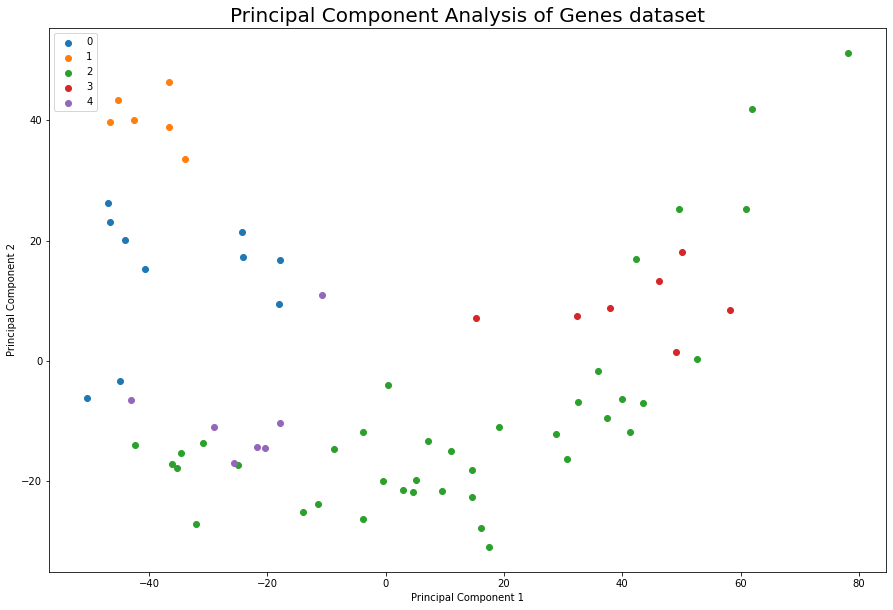

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_train)


plt.figure()
plt.figure(figsize=(15,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel('Principal Component - 1',fontsize=20)
# plt.ylabel('Principal Component - 2',fontsize=20)

plt.title("Principal Component Analysis of Genes dataset",fontsize=20)
# targets = ['MED', 'MGL','RHB','EPD','JPA']
# colors = ['r', 'g','blue','brown','black']
for label in np.unique(y):
    plt.scatter(pca_data[y==label, 0], pca_data[y==label, 1], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# for target, color in zip(targets,colors):
#     indicesToKeep =pd.DataFrame(y) == target
#     plt.scatter(pca_data.loc[indicesToKeep, 'principal component 1']
#                , pca_data.loc[indicesToKeep, 'principal component 2'], c = y, s = 50)
# plt.legend(targets,prop={'size': 15})

**Graphical representation of the class distribution using 3 principal components**

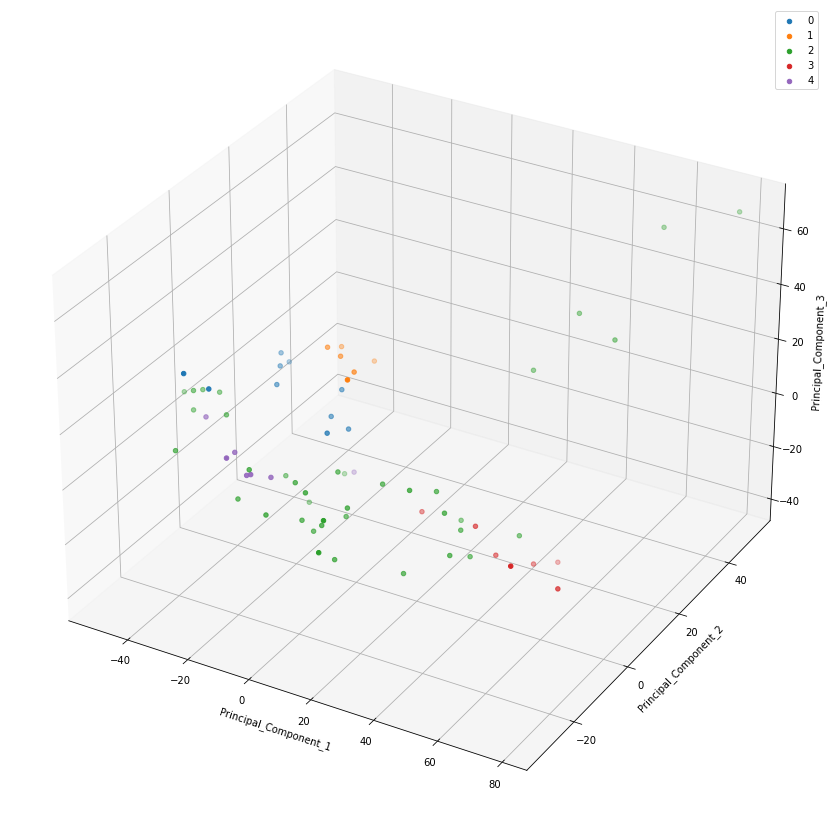

In [24]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_train)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,15))
axis = fig.add_subplot(111, projection='3d')
for label in np.unique(y):
    axis.scatter(pca_data[y==label, 0], pca_data[y==label, 1], pca_data[y==label, 2], label=label)
# .scatter(pca_data.iloc[:,0] ,pca_data.iloc[:,1], pca_data.iloc[:,2], c=y, cmap='Accent')
axis.set_xlabel("Principal_Component_1", fontsize=10)
axis.set_ylabel("Principal_Component_2", fontsize=10)
axis.set_zlabel("Principal_Component_3", fontsize=10)
axis.legend()
plt.show()


**From the plots above, using 2 components seem to group the classes best, so we use two components for the machine learning models**

In [23]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_train)

pca_data1 = pd.DataFrame(data = pca_data, 
                        columns = ['PCA_1', 'PCA_2'])
pca_data1

,PCA_1,PCA_2
0,-32.128838,-27.135858
1,-36.047417,-17.200288
2,-35.280628,-17.778128
3,-42.308953,-13.966140
4,-30.828425,-13.695063
...,...,...
64,-45.232189,43.389122
65,-36.714497,38.910462
66,-42.519486,40.135030
67,-33.914147,33.488380


# Machine Learning on training and validation data

Stratified kfolding has been employed as the cross validation technique, because of the imbalanced nature of the dataset

**Using the default configuration for K-Nearest Neighbor model**

In [98]:
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
# skf.get_n_splits(X_pca, y)
# foldNum=0

X_pca = scaler.fit_transform(pca_data1)

Knn_Model = KNeighborsClassifier()
lst_accu_stratified_train = []
lst_accu_stratified_val = []

for train_index, val_index in skf.split(pca_data1, y):
#     foldNum+=1
#     print("Results for fold",foldNum)
    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    Knn_Model.fit(X_train_fold, y_train_fold)
    lst_accu_stratified_train.append(Knn_Model.score(X_train_fold, y_train_fold))
    lst_accu_stratified_val.append(Knn_Model.score(X_val_fold, y_val_fold))
  
print ('For train data')
print('List of possible accuracy:', lst_accu_stratified_train)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_train)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_train)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_train)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_train))

print ('\n')
print ('For validation data')
print('List of possible accuracy:', lst_accu_stratified_val)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_val)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_val)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_val)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_val))


For train data
List of possible accuracy: [0.8909090909090909, 0.8909090909090909, 0.9272727272727272, 0.8909090909090909, 0.9107142857142857]
Maximum Accuracy That can be obtained from this model is: 92.72727272727272 %
Minimum Accuracy: 89.0909090909091 %
Overall Accuracy: 90.21428571428571 %
Standard Deviation is: 0.016458829483623382


For validation data
List of possible accuracy: [0.7857142857142857, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 0.7692307692307693]
Maximum Accuracy That can be obtained from this model is: 85.71428571428571 %
Minimum Accuracy: 64.28571428571429 %
Overall Accuracy: 78.24175824175825 %
Standard Deviation is: 0.08779181332916106


**KNN prediction accuracy on the train, validation and train + validation data**

In [34]:
from sklearn.metrics import accuracy_score
KNN_predictions_train = Knn_Model.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, KNN_predictions_train)))

KNN_predictions_val = Knn_Model.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, KNN_predictions_val)))

KNN_predictions_all = Knn_Model.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, KNN_predictions_all)))

accuracy on train data =  0.9107142857142857
accuracy on validation data =  0.7692307692307693
accuracy on train + validation data =  0.8840579710144928


**Plot of the KNN predicted training data and the actual training data**

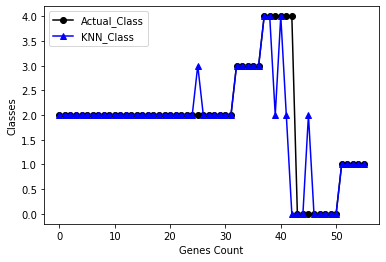

In [35]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(KNN_predictions_train, color = 'blue', label = 'KNN_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the KNN predicted validation data and the actual validation data**

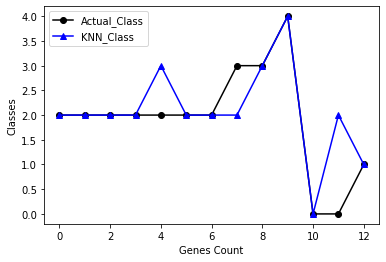

In [36]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(KNN_predictions_val, color = 'blue', label = 'KNN_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Tuning the KNN hyperparameters. Great improvement in performance is observed**

In [99]:
from sklearn.model_selection import GridSearchCV
from statistics import mean, stdev

neighbors=np.array([1,2,3,4,5,6,7])
weights = ['uniform','distance']
# leafsize=[85,90,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110]
pp=[1,2]
param_grid = dict(n_neighbors=neighbors,weights=weights,p=pp)

Knn_Model=KNeighborsClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=Knn_Model, param_grid=param_grid, scoring='accuracy', cv=skf)
grid_result = grid.fit(X_pca, y)
print("Best mse error on training + kfold validation data: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

pp=grid_result.best_params_['p']
# leafsize=grid_result.best_params_['leaf_size']
weight=grid_result.best_params_['weights']
neighbor=grid_result.best_params_['n_neighbors']
######################################################
model_knn=KNeighborsClassifier(n_neighbors=neighbor,weights=weight,p=pp)
model_knn.fit(X_train_fold, y_train_fold)
KNN_predictionsgrid_train = model_knn.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, KNN_predictionsgrid_train)))

# predict the validation dataset
KNN_predictionsgrid_val = model_knn.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, KNN_predictionsgrid_val)))

KNN_predictionsgrid_all = model_knn.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, KNN_predictionsgrid_all)))

Best mse error on training + kfold validation data: 0.898901 using {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
accuracy on train data =  0.9285714285714286
accuracy on validation data =  0.9230769230769231
accuracy on train + validation data =  0.927536231884058


**Plot of the tuned KNN predicted training data and the actual training data**

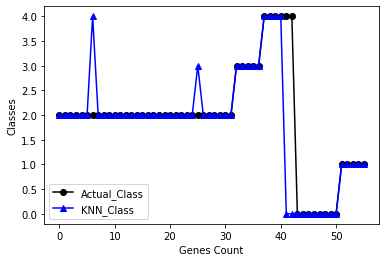

In [38]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(KNN_predictionsgrid_train, color = 'blue', label = 'KNN_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the tuned KNN predicted validation data and the actual validation data**

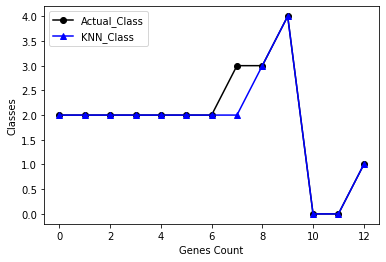

In [39]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(KNN_predictionsgrid_val, color = 'blue', label = 'KNN_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Save the KNN model**

In [100]:
import pickle

knnpickle = open('Gene_KNN', 'wb')

pickle.dump(model_knn, knnpickle)

**Using the default configuration for Decision tree model**

In [41]:
from statistics import mean, stdev
from sklearn.tree import DecisionTreeClassifier 
DT_Model=DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# skf.get_n_splits(X_pca, y)
# foldNum=0
lst_accu_stratified_train = []
lst_accu_stratified_val = []
for train_index, val_index in skf.split(pca_data1, y):
#     foldNum+=1
#     print("Results for fold",foldNum)
    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    DT_Model.fit(X_train_fold, y_train_fold)
    lst_accu_stratified_train.append(DT_Model.score(X_train_fold, y_train_fold))
    lst_accu_stratified_val.append(DT_Model.score(X_val_fold, y_val_fold))
  
print ('For train data')
print('List of possible accuracy:', lst_accu_stratified_train)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_train)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_train)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_train)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_train))

print ('\n')
print ('For validation data')
print('List of possible accuracy:', lst_accu_stratified_val)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_val)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_val)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_val)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_val))



For train data
List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]
Maximum Accuracy That can be obtained from this model is: 100.0 %
Minimum Accuracy: 100.0 %
Overall Accuracy: 100.0 %
Standard Deviation is: 0.0


For validation data
List of possible accuracy: [0.8571428571428571, 0.9285714285714286, 0.6428571428571429, 0.8571428571428571, 0.9230769230769231]
Maximum Accuracy That can be obtained from this model is: 92.85714285714286 %
Minimum Accuracy: 64.28571428571429 %
Overall Accuracy: 84.17582417582418 %
Standard Deviation is: 0.11638758230713482


**DT prediction accuracy on the train, validation and train + validation data**

In [42]:
DT_predictions_train = DT_Model.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, DT_predictions_train)))

DT_predictions_val = DT_Model.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, DT_predictions_val)))

DT_predictions_all = DT_Model.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, DT_predictions_all)))



DT_predictions_all = pd.DataFrame(DT_predictions_all)

accuracy on train data =  1.0
accuracy on validation data =  0.9230769230769231
accuracy on train + validation data =  0.9855072463768116


**Plot of the DT predicted training data and the actual training data**

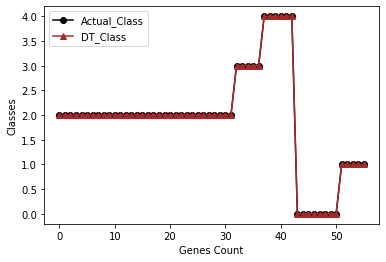

In [43]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(DT_predictions_train, color = 'brown', label = 'DT_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')A
plt.show()

**Plot of the DT predicted validation data and the actual validation data**

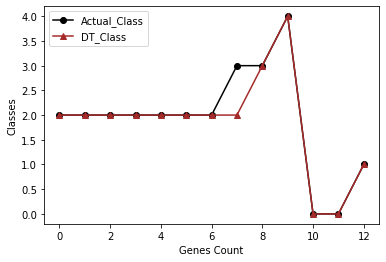

In [48]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(DT_predictions_val, color = 'brown', label = 'DT_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Tuning the DT hyperparameters. Great improvement in performance is observed**

In [101]:
min_samples_split=[2,3,4,5,6,7]
min_samples_leaf=[1,2,3,4,5]
max_leaf_nodes=[20,40,50,70,90,100,120,130,140,150,180,190,200,210,220,240,250,280,300,320,350,400]
max_depth=[2,3,4,5,6,7,8,9,10,12,15,18]
param_grid = dict(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                  max_leaf_nodes=max_leaf_nodes,max_depth=max_depth)

DT_model=DecisionTreeClassifier(random_state=1)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=DT_model, param_grid=param_grid, scoring='accuracy', cv=skf, n_jobs=-1)
grid_result = grid.fit(X_pca, y)
print("Best error on kfold training + validation data: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
######################################################
min_samples_split=grid_result.best_params_['min_samples_split']
min_samples_leaf=grid_result.best_params_['min_samples_leaf']
max_leaf_nodes=grid_result.best_params_['max_leaf_nodes']
max_depth=grid_result.best_params_['max_depth']


#################################################
model_tree=DecisionTreeClassifier(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                            max_leaf_nodes=max_leaf_nodes,random_state=1)
model_tree.fit(X_train_fold, y_train_fold)
DT_predictionsgrid_train = model_tree.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, DT_predictionsgrid_train)))
DT_predictionsgrid_val = model_tree.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, DT_predictionsgrid_val)))
DT_predictionsgrid_all = model_tree.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, DT_predictionsgrid_all)))



Best error on kfold training + validation data: 0.884615 using {'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy on train data =  1.0
accuracy on validation data =  0.9230769230769231
accuracy on train + validation data =  0.9855072463768116


**Plot of the tuned DT predicted training data and the actual training data**

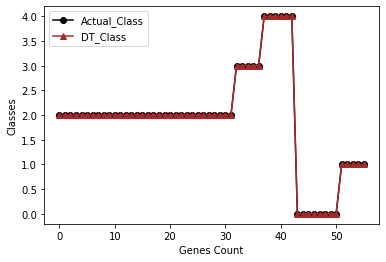

In [51]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(DT_predictionsgrid_train, color = 'brown', label = 'DT_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the tuned DT predicted validation data and the actual validation data**

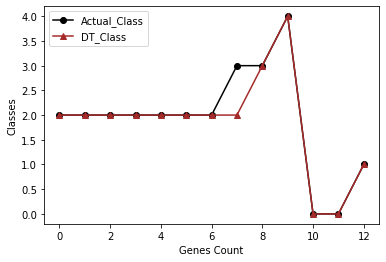

In [52]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(DT_predictionsgrid_val, color = 'brown', label = 'DT_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Save the model**

In [102]:
import pickle

dtpickle = open('Gene_DT', 'wb')

pickle.dump(model_tree, dtpickle)

**Using the default configuration for Random Forest model**

In [54]:
from statistics import mean, stdev
from sklearn.ensemble import RandomForestClassifier
RF_Model=RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# skf.get_n_splits(X_pca, y)
# foldNum=0
lst_accu_stratified_train = []
lst_accu_stratified_val = []
for train_index, val_index in skf.split(pca_data1, y):
#     foldNum+=1
#     print("Results for fold",foldNum)
    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    RF_Model.fit(X_train_fold, y_train_fold)
    lst_accu_stratified_train.append(RF_Model.score(X_train_fold, y_train_fold))
    lst_accu_stratified_val.append(RF_Model.score(X_val_fold, y_val_fold))
  
print ('For train data')
print('List of possible accuracy:', lst_accu_stratified_train)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_train)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_train)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_train)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_train))

print ('\n')
print ('For validation data')
print('List of possible accuracy:', lst_accu_stratified_val)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_val)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_val)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_val)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_val))




For train data
List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]
Maximum Accuracy That can be obtained from this model is: 100.0 %
Minimum Accuracy: 100.0 %
Overall Accuracy: 100.0 %
Standard Deviation is: 0.0


For validation data
List of possible accuracy: [0.8571428571428571, 0.9285714285714286, 0.6428571428571429, 0.9285714285714286, 0.8461538461538461]
Maximum Accuracy That can be obtained from this model is: 92.85714285714286 %
Minimum Accuracy: 64.28571428571429 %
Overall Accuracy: 84.06593406593407 %
Standard Deviation is: 0.11713739343586725


**RF prediction accuracy on the train, validation and train + validation data**

In [55]:
RF_predictions_train = RF_Model.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, RF_predictions_train)))

RF_predictions_val = RF_Model.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, RF_predictions_val)))

RF_predictions_all = RF_Model.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, RF_predictions_all)))


accuracy on train data =  1.0
accuracy on validation data =  0.8461538461538461
accuracy on train + validation data =  0.9710144927536232


**Plot of the RF predicted training data and the actual training data**

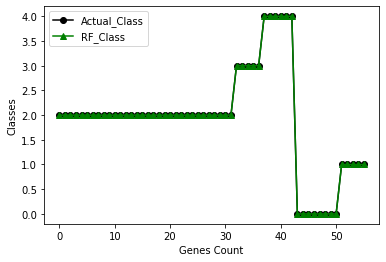

In [56]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(RF_predictions_train, color = 'green', label = 'RF_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the RF predicted validation data and the actual validation data**

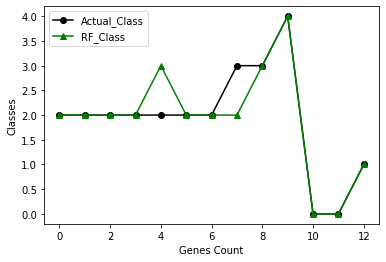

In [57]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(RF_predictions_val, color = 'green', label = 'RF_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Tuning the RF hyperparameters. Great improvement in performance is observed**

In [103]:
n_estimators=np.arange(20,220,20)
param_grid = dict(n_estimators=n_estimators)

RF_model=RandomForestClassifier(random_state=1)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=RF_model, param_grid=param_grid, scoring='accuracy', cv=skf)
grid_result = grid.fit(X_pca, y)
print("Best error on kfold training + validation data: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
######################################################
n_estimators=grid_result.best_params_['n_estimators']

#################################################
model_forest=RandomForestClassifier(n_estimators=n_estimators, random_state=1)
model_forest.fit(X_train_fold, y_train_fold)
RF_predictionsgrid_train = model_forest.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, RF_predictionsgrid_train)))
RF_predictionsgrid_val = model_forest.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, RF_predictionsgrid_val)))
RF_predictionsgrid_all = model_forest.predict(X_pca)
print("accuracy on trainn + validation data = ",(accuracy_score(y, RF_predictionsgrid_all)))



Best error on kfold training + validation data: 0.856044 using {'n_estimators': 40}
accuracy on train data =  1.0
accuracy on validation data =  0.9230769230769231
accuracy on trainn + validation data =  0.9855072463768116


**Plot of the tuned RF predicted training data and the actual training data**

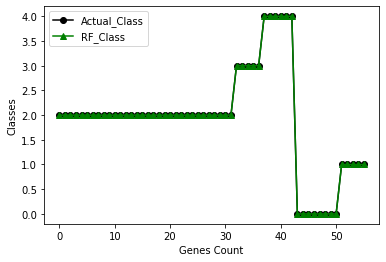

In [59]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(RF_predictionsgrid_train, color = 'green', label = 'RF_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the tuned KNN predicted validation data and the actual validation data**

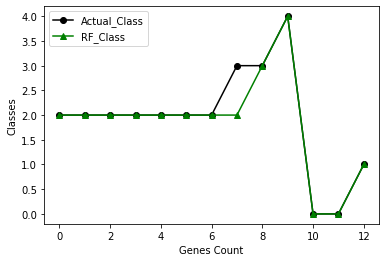

In [60]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(RF_predictionsgrid_val, color = 'green', label = 'RF_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Save the model**

In [104]:
import pickle

RFpickle = open('Gene_RF', 'wb')

pickle.dump(model_forest, RFpickle)

**Using the default configuration for Gaussian Naive Bayes model**

In [62]:
from statistics import mean, stdev
from sklearn.naive_bayes import GaussianNB
GNB_Model=GaussianNB()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# skf.get_n_splits(X_pca, y)
# foldNum=0
lst_accu_stratified_train = []
lst_accu_stratified_val = []
for train_index, val_index in skf.split(pca_data1, y):
#     foldNum+=1
#     print("Results for fold",foldNum)
    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    GNB_Model.fit(X_train_fold, y_train_fold)
    lst_accu_stratified_train.append(GNB_Model.score(X_train_fold, y_train_fold))
    lst_accu_stratified_val.append(GNB_Model.score(X_val_fold, y_val_fold))
  
print ('For train data')
print('List of possible accuracy:', lst_accu_stratified_train)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_train)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_train)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_train)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_train))

print ('\n')
print ('For validation data')
print('List of possible accuracy:', lst_accu_stratified_val)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_val)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_val)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_val)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_val))





For train data
List of possible accuracy: [0.8545454545454545, 0.8181818181818182, 0.8909090909090909, 0.8909090909090909, 0.8035714285714286]
Maximum Accuracy That can be obtained from this model is: 89.0909090909091 %
Minimum Accuracy: 80.35714285714286 %
Overall Accuracy: 85.16233766233766 %
Standard Deviation is: 0.04038130995846815


For validation data
List of possible accuracy: [0.7857142857142857, 0.7857142857142857, 0.7142857142857143, 0.7142857142857143, 0.8461538461538461]
Maximum Accuracy That can be obtained from this model is: 84.61538461538461 %
Minimum Accuracy: 71.42857142857143 %
Overall Accuracy: 76.92307692307693 %
Standard Deviation is: 0.0558983240367467


**GNB prediction accuracy on the train, validation and train + validation data**

In [63]:
GNB_predictions_train = GNB_Model.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, GNB_predictions_train)))

GNB_predictions_val = GNB_Model.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, GNB_predictions_val)))

GNB_predictions_all = GNB_Model.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, GNB_predictions_all)))


GNB_predictions_all = pd.DataFrame(GNB_predictions_all)
GNB_predictions_all.to_csv('iv.csv', index=False)



accuracy on train data =  0.8035714285714286
accuracy on validation data =  0.8461538461538461
accuracy on train + validation data =  0.8115942028985508


**Plot of the GNB predicted training data and the actual training data**

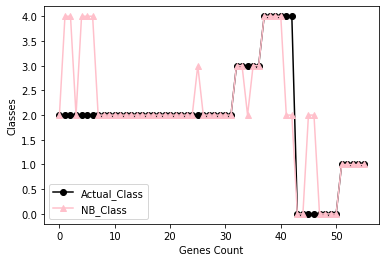

In [64]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(GNB_predictions_train, color = 'pink', label = 'NB_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the GNB predicted validation data and the actual validation data**

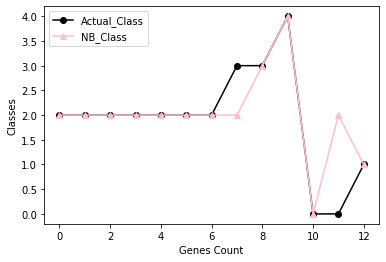

In [65]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(GNB_predictions_val, color = 'pink', label = 'NB_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Tuning the GNB hyperparameters. Great improvement in performance is observed**

In [105]:
n_estimators=np.arange(20,220,20)
param_grid = dict(var_smoothing=np.logspace(0,-9, num=100))

GNB_model = GaussianNB()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(estimator=GNB_model, param_grid=param_grid, scoring='accuracy', cv=skf)
grid_result = grid.fit(X_pca, y)
print("Best error on kfold training + validation data: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
######################################################
var_smoothing=grid_result.best_params_['var_smoothing']

#################################################
model_GNB=GaussianNB(var_smoothing=var_smoothing)
model_GNB.fit(X_train_fold, y_train_fold)
GNB_predictionsgrid_train = model_GNB.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, GNB_predictionsgrid_train)))
GNB_predictionsgrid_val = model_GNB.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, GNB_predictionsgrid_val)))

GNB_predictionsgrid_all = model_GNB.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, GNB_predictionsgrid_all)))

Best error on kfold training + validation data: 0.769231 using {'var_smoothing': 0.03511191734215131}
accuracy on train data =  0.8035714285714286
accuracy on validation data =  0.8461538461538461
accuracy on train + validation data =  0.8115942028985508


**Plot of the tuned GNB predicted training data and the actual training data**

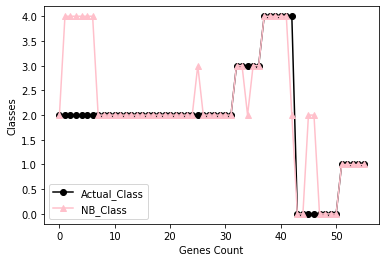

In [67]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(GNB_predictionsgrid_train, color = 'pink', label = 'NB_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the tuned GNB predicted validation data and the actual validation data**

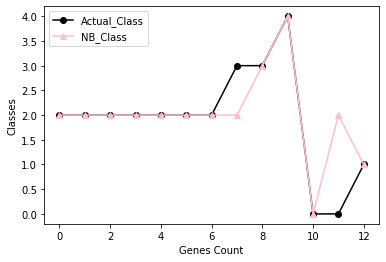

In [68]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(GNB_predictionsgrid_val, color = 'pink', label = 'NB_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Save the model**

In [106]:
import pickle

GNBpickle = open('Gene_GNB', 'wb')

pickle.dump(model_GNB, GNBpickle)

**Using the default configuration for AdaBoost model**

In [118]:
from statistics import mean, stdev
from sklearn.ensemble import AdaBoostClassifier
ADB_Model = AdaBoostClassifier()
# skf.get_n_splits(X_pca, y)
# foldNum=0
lst_accu_stratified_train = []
lst_accu_stratified_val = []
for train_index, val_index in skf.split(pca_data1, y):
#     foldNum+=1
#     print("Results for fold",foldNum)
    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    ADB_Model.fit(X_train_fold, y_train_fold)
    lst_accu_stratified_train.append(ADB_Model.score(X_train_fold, y_train_fold))
    lst_accu_stratified_val.append(ADB_Model.score(X_val_fold, y_val_fold))
  
print ('For train data')
print('List of possible accuracy:', lst_accu_stratified_train)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_train)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_train)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_train)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_train))

print ('\n')
print ('For validation data')
print('List of possible accuracy:', lst_accu_stratified_val)
print('Maximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified_val)*100, '%')
print('Minimum Accuracy:',
      min(lst_accu_stratified_val)*100, '%')
print('Overall Accuracy:',
      mean(lst_accu_stratified_val)*100, '%')
print('Standard Deviation is:', stdev(lst_accu_stratified_val))






For train data
List of possible accuracy: [0.8181818181818182, 0.6727272727272727, 0.8, 0.7090909090909091, 0.6607142857142857]
Maximum Accuracy That can be obtained from this model is: 81.81818181818183 %
Minimum Accuracy: 66.07142857142857 %
Overall Accuracy: 73.21428571428572 %
Standard Deviation is: 0.07275118461262374


For validation data
List of possible accuracy: [0.6428571428571429, 0.6428571428571429, 0.42857142857142855, 0.6428571428571429, 0.7692307692307693]
Maximum Accuracy That can be obtained from this model is: 76.92307692307693 %
Minimum Accuracy: 42.857142857142854 %
Overall Accuracy: 62.527472527472526 %
Standard Deviation is: 0.12282401409083972


**ADB prediction accuracy on the train, validation and train + validation data**

In [71]:
ADB_predictions_train = ADB_Model.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, ADB_predictions_train)))

ADB_predictions_val = ADB_Model.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, ADB_predictions_val)))

ADB_predictions_all = ADB_Model.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, ADB_predictions_all)))



ADB_predictions_all = pd.DataFrame(ADB_predictions_all)
ADB_predictions_all.to_csv('v.csv', index=False)




accuracy on train data =  0.6607142857142857
accuracy on validation data =  0.7692307692307693
accuracy on train + validation data =  0.6811594202898551


**Plot of the ADB predicted training data and the actual training data**

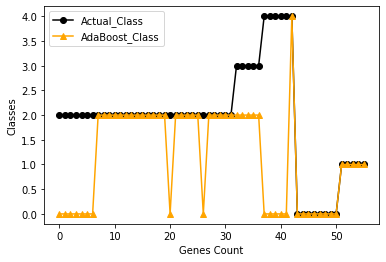

In [72]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(ADB_predictions_train, color = 'orange', label = 'AdaBoost_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the ADB predicted validation data and the actual validation data**

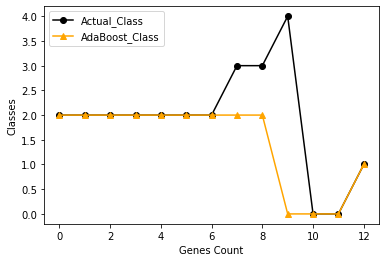

In [73]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(ADB_predictions_val, color = 'orange', label = 'AdaBoost_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Tuning the ADB hyperparameters. Great improvement in performance is observed**

In [120]:
param_grid = dict(learning_rate=[(0.97 + x/100) for x in range(0, 8)],
                  algorithm = ['SAMME', 'SAMME.R'],
                 n_estimators=np.arange(20,100,10))

DT = DecisionTreeClassifier(random_state=1, max_features='auto', class_weight='balanced',
                           max_depth=None)

ADB_model = AdaBoostClassifier(base_estimator=DT)

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
grid = GridSearchCV(estimator=ADB_model, param_grid=param_grid, scoring='accuracy', cv=skf)
grid_result = grid.fit(X_pca, y)
print("Best error on kfold training + validation data: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
######################################################
learning_rate = grid_result.best_params_['learning_rate']
algorithm = grid_result.best_params_['algorithm']
n_estimators = grid_result.best_params_['n_estimators']

#################################################
model_ADB=AdaBoostClassifier(base_estimator=DT, learning_rate=learning_rate,
                            algorithm=algorithm,
                            n_estimators=n_estimators)

model_ADB.fit(X_train_fold, y_train_fold)
ADB_predictionsgrid_train = model_ADB.predict(X_train_fold)
print("accuracy on train data = ",(accuracy_score(y_train_fold, ADB_predictionsgrid_train)))
ADB_predictionsgrid_val = model_ADB.predict(X_val_fold)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, ADB_predictionsgrid_val)))
ADB_predictionsgrid_all = model_ADB.predict(X_pca)
print("accuracy on train + validation data = ",(accuracy_score(y, ADB_predictionsgrid_all)))

Best error on kfold training + validation data: 0.827473 using {'algorithm': 'SAMME.R', 'learning_rate': 1.01, 'n_estimators': 40}
accuracy on train data =  1.0
accuracy on validation data =  0.9230769230769231
accuracy on train + validation data =  0.9855072463768116


**Plot of the tuned ADB predicted training data and the actual training data**

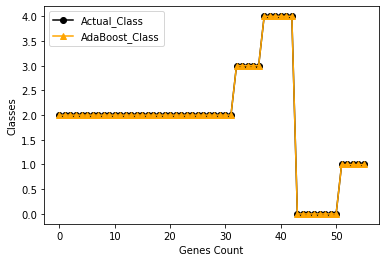

In [78]:
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(ADB_predictionsgrid_train, color = 'orange', label = 'AdaBoost_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Plot of the tuned ADB predicted validation data and the actual validation data**

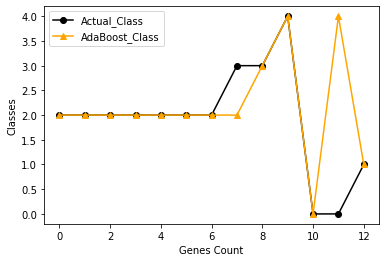

In [79]:
plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(ADB_predictionsgrid_val, color = 'orange', label = 'AdaBoost_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**Save the model**

In [121]:
import pickle

ADBpickle = open('Gene_ADB', 'wb')

pickle.dump(model_ADB, ADBpickle)


**Creating the Artificial Neural Network model and fitting it to the data using stratified kfold cross validation. Great performance is observed**

Results for fold 1
1/1 [==============================] - 0s 36ms/step
              precision    recall  f1-score   support

         EPD       0.67      1.00      0.80         2
         JPA       1.00      1.00      1.00         1
         MED       1.00      1.00      1.00         8
         MGL       1.00      1.00      1.00         2
         RHB       0.00      0.00      0.00         1

    accuracy                           0.93        14
   macro avg       0.73      0.80      0.76        14
weighted avg       0.88      0.93      0.90        14

Accuracy  : 0.9285714285714286
Precision : 0.8809523809523808
f1Score : 0.9


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


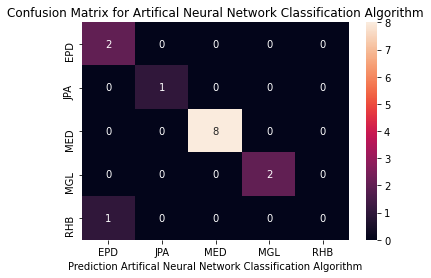

Results for fold 2
1/1 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

         EPD       1.00      1.00      1.00         2
         JPA       1.00      1.00      1.00         1
         MED       0.73      1.00      0.84         8
         MGL       0.00      0.00      0.00         1
         RHB       0.00      0.00      0.00         2

    accuracy                           0.79        14
   macro avg       0.55      0.60      0.57        14
weighted avg       0.63      0.79      0.70        14

Accuracy  : 0.7857142857142857
Precision : 0.6298701298701299
f1Score : 0.6954887218045113


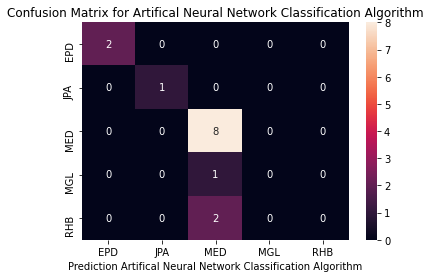

Results for fold 3
1/1 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

         EPD       0.67      1.00      0.80         2
         JPA       1.00      1.00      1.00         1
         MED       0.89      1.00      0.94         8
         MGL       1.00      1.00      1.00         1
         RHB       0.00      0.00      0.00         2

    accuracy                           0.86        14
   macro avg       0.71      0.80      0.75        14
weighted avg       0.75      0.86      0.79        14

Accuracy  : 0.8571428571428571
Precision : 0.7460317460317459
f1Score : 0.7949579831932773


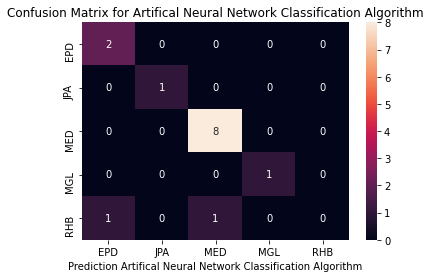

Results for fold 4
1/1 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

         EPD       1.00      1.00      1.00         2
         JPA       1.00      1.00      1.00         2
         MED       1.00      0.75      0.86         8
         MGL       0.50      1.00      0.67         1
         RHB       0.50      1.00      0.67         1

    accuracy                           0.86        14
   macro avg       0.80      0.95      0.84        14
weighted avg       0.93      0.86      0.87        14

Accuracy  : 0.8571428571428571
Precision : 0.9285714285714286
f1Score : 0.8707482993197279


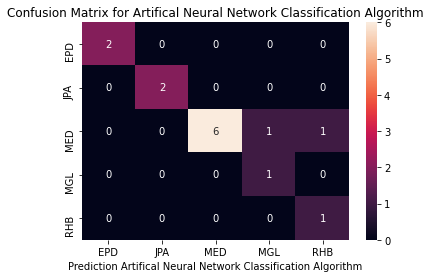

Results for fold 5
1/1 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

         EPD       1.00      1.00      1.00         2
         JPA       1.00      1.00      1.00         1
         MED       0.88      1.00      0.93         7
         MGL       1.00      0.50      0.67         2
         RHB       1.00      1.00      1.00         1

    accuracy                           0.92        13
   macro avg       0.97      0.90      0.92        13
weighted avg       0.93      0.92      0.91        13

Accuracy  : 0.9230769230769231
Precision : 0.9326923076923077
f1Score : 0.9128205128205129


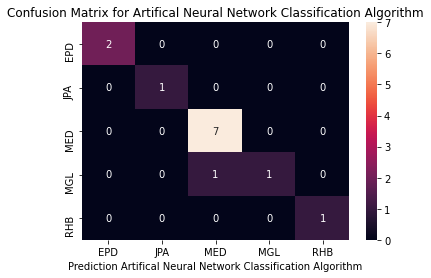

In [109]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import seaborn as sns

scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)


# # Test options and evaluation metric
# num_folds = 10
# seed = 7
# scoring = 'neg_mean_squared_error'

# tf.random.set_seed(seed)
n_class = len(np.unique(y))

Ann_Model=Sequential([
    Dense(units = 50, activation = 'relu', input_dim = 2, kernel_initializer='normal'),
    Dense(units = 50, activation = 'relu', kernel_initializer='normal'),
    Dense(units = n_class, activation='softmax')
])

# Ann_Model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
Ann_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# cv_results = cross_val_score(Ann_Model, pca_data1, y_df, cv=kfold, 
#                                  scoring='accuracy')

# print ("CV for each fold:", cv_results)
# print ("%s: %f %s (%f)" % ("Mean of the folds:", cv_results.mean(), 
#                                "STD", cv_results.std()))

#<<<<<result function>>>>>>>>>>>
def Results(val, pred):
    target_names = ['EPD', 'JPA', 'MED','MGL','RHB']
    print(classification_report(val, pred, target_names=target_names))
    accuracy = accuracy_score(val, pred)
    precision=precision_score(val, pred, average='weighted', labels=np.unique(y_val_fold))
    f1Score=f1_score(val, pred, average='weighted', labels=np.unique(y_val_fold)) 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))  
    # Plot Confusion Matrix for Logistic Regression Classification Algorithm
    confusionmatrix = confusion_matrix(y_val_fold, ANN_Predictions_val)
    label = ['EPD', 'JPA', 'MED','MGL','RHB']
    sns.heatmap(confusionmatrix, annot = True, xticklabels = label, yticklabels = label)
    plt.xlabel("Prediction Artifical Neural Network Classification Algorithm")
    plt.title("Confusion Matrix for Artifical Neural Network Classification Algorithm")
    plt.show()

X_pca = scaler.fit_transform(pca_data1)
#<<<<<<<Cross Validation >>>>>>>>>>

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
skf.get_n_splits(pca_data1, y)
foldNum=0
for train_index, val_index in skf.split(pca_data1, y):
    foldNum+=1
    print("Results for fold",foldNum)
    X_train_fold, X_val_fold = X_pca[train_index], X_pca[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    y_train_fold = to_categorical(y_train_fold)
    y_val_fold = to_categorical(y_val_fold)    
    
    Ann_Model.fit(X_train_fold, y_train_fold, 
                        validation_data = (X_val_fold, y_val_fold), 
                        epochs=110, 
                        batch_size=16, verbose=0)  
    
#     ANN_Predictions_train = Ann_Model.predict(X_train_fold)
    ANN_Predictions_val = Ann_Model.predict(X_val_fold)
    
    #Converting one hot encoded test label to label    
#     ANN_Predictions_train = Ann_Model.predict(y_train_fold)
#     y_train_fold = np.argmax(y_train_fold, axis=1)
    ANN_Predictions_val = np.argmax(ANN_Predictions_val, axis=1)
    y_val_fold = np.argmax(y_val_fold, axis=1)
    
    Results(y_val_fold, ANN_Predictions_val)


# Ann_Model.fit(x=rescaledX,y=Y_train,batch_size=32,epochs=800,validation_split = 0.1,shuffle=True,verbose=0)
# y_train_predict=modelannlife.predict(rescaledX)

# # transform the validation dataset
# rescaledX_test = scaler.transform(X_test)
# y_test_predict=modelannlife.predict(rescaledX_test)

# score_train = Ann_Model.evaluate(rescaledX, Y_train, verbose=0)
# print('RMS error on training data = ', np.sqrt(score_train))
# score_test = Ann_Model.evaluate(rescaledX_test, Y_test, verbose=0)
# print('RMS error on test data = ', np.sqrt(score_test))

**ANN prediction accuracy on the train data and plot**

2/2 [==============================] - 0s 2ms/step
accuracy on train data =  0.9642857142857143


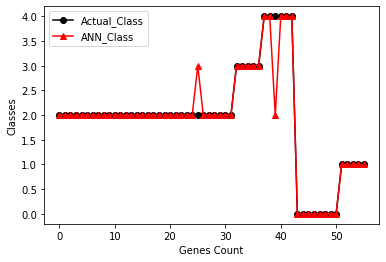

In [82]:
y_train_fold = np.argmax(y_train_fold, axis=1)
ANN_Predictions_train = Ann_Model.predict(X_train_fold)
ANN_Predictions_train = np.argmax(ANN_Predictions_train, axis=1)
print("accuracy on train data = ",(accuracy_score(y_train_fold, ANN_Predictions_train)))
 
plt.plot(y_train_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(ANN_Predictions_train, color = 'red', label = 'ANN_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**ANN prediction accuracy on validation data and plot**

1/1 [==============================] - 0s 17ms/step
accuracy on validation data =  0.9230769230769231


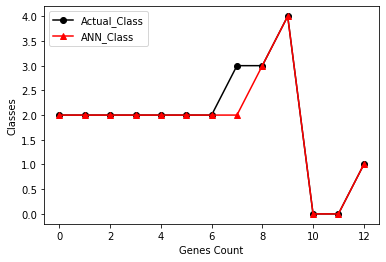

In [83]:
ANN_Predictions_val = Ann_Model.predict(X_val_fold)
ANN_Predictions_val = np.argmax(ANN_Predictions_val, axis=1)
print("accuracy on validation data = ",(accuracy_score(y_val_fold, ANN_Predictions_val)))

plt.plot(y_val_fold, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(ANN_Predictions_val, color = 'red', label = 'ANN_Class', marker='^' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

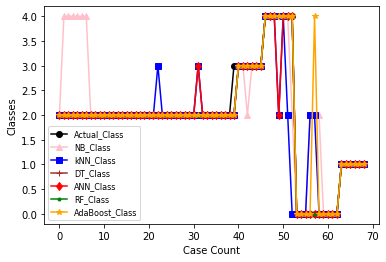

In [96]:
plt.plot(y, color = 'black', label = 'Actual_Class', marker='o')
plt.plot(GNB_predictionsgrid_all, color = 'pink', label = 'NB_Class', marker='^' )
plt.plot(KNN_predictions_all, color = 'blue', label = 'kNN_Class', marker='s' )
plt.plot(DT_predictionsgrid_all, color = 'brown', label = 'DT_Class', marker='+' )
plt.plot(ANN_Predictions_all, color = 'red', label = 'ANN_Class', marker='d' )
plt.plot(RF_predictionsgrid_all, color = 'green', label = 'RF_Class', marker='.' )
plt.plot(ADB_predictionsgrid_all, color = 'orange', label = 'AdaBoost_Class', marker='*' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Case Count')
plt.ylabel('Classes')
plt.legend(loc='lower left',prop={'size':8})
plt.savefig('Gene_train.pdf')
plt.show()

**ANN predicition accuracy on training + validation data**

In [94]:
# y_all = np.argmax(y, axis=1)
ANN_Predictions_all = Ann_Model.predict(X_pca)
ANN_Predictions_all = np.argmax(ANN_Predictions_all, axis=1)
print("accuracy on train + validation data = ",(accuracy_score(y, ANN_Predictions_all)))

3/3 [==============================] - 0s 2ms/step
accuracy on train + validation data =  0.9565217391304348


**Save the ANN model**

In [110]:
Ann_Model.save("Gene_ANN_Model.h5")

# Data Preparation - test data

**Same process of preparing the train data is done for test data**

In [24]:
df_test_edited = df_test.drop(columns='SNO') 

df_test_thresholded = df_test_edited[(df_test_edited >= 20) & (df_test_edited <= 16000)]

half_count = len(df_test_thresholded) / 2
df_test_thresholded.dropna(thresh=half_count,axis=1)

df_test_ = SimpleImputer(missing_values=np.nan, strategy='median')
df_test_ = df_test_.fit_transform(df_test_thresholded)

df_test_ = pd.DataFrame(df_test_)

result= []
for i in range (len(df_test_)):
    row = pd.DataFrame(df_test_).iloc[i]
    result.append(row.max()/row.min())

# print (result)

result = pd.DataFrame(result)
result = result.iloc[:,-1]

df_test_concat = pd.concat([pd.DataFrame(df_test_), result], ignore_index=True, axis=1)


#Applying the condition of dropping columns Max/Min result is less than 2

df_test_condition = df_test_concat[df_test_concat.iloc[:,-1] >= 2]

df_testt = df_test_condition.drop(columns=23)

df_testt_ = df_testt.join(df_train['SNO'])

first_column = df_testt_.pop('SNO')
df_testt_.insert(0, 'SNO', first_column)

df_test_trans = df_testt_.transpose()

new_header = df_test_trans.iloc[0]

df_test_1 = df_test_trans[1:]

df_test_1.columns = new_header
df_test_1.rename(columns=df_test_trans.iloc[0])

df_test_1

SNO,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000462_at,AB000464_at,AB000466_at,...,M93143_at,S78825_at,U11863_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,M71243_f_at
0,58,36,89,64,89,89,89,119,254,36,...,59,42,115,129,25,216,89,288,74,61
1,52,34,255,87.5,220,28,87.5,93,143,87.5,...,46,87.5,136,122,25,236,20,161,33,22
2,90,32,90,133,186,90,90,66,204,90,...,59,90,123,153,90,138,33,400,36,55
3,46,30,91,62,232,91,91,62,162,23,...,50,91,147,146,91,152,91,206,44,51
4,48,22,89,110,169,21,89,42,59,89,...,49,89,242,179,27,146,28,171,42,89
5,31,57,88,77,251,88,88,179,339,25,...,58,88,87,130,88,102,88,257,43,82
6,88,88,88,22,210,88,88,124,183,88,...,42,88,94,150,88,138,55,216,23,48
7,23,88,88,33,142,27,88,36,106,88,...,52,88,111,375,47,98,22,155,51,34
8,47,29,33,132,131,88,88,44,100,88,...,24,88,127,163,24,165,31,284,35,24
9,42,89,22,89,113,89,89,36,104,89,...,26,89,107,197,25,310,71,234,32,23


In [25]:
df_test_1 = df_test_1.astype(float)

def scatter_coefficient(X, normalize=True):
    corr = np.corrcoef(X, rowvar=False)
    if normalize:
        return np.linalg.det(corr) / np.trace(corr)
    else:
        return np.linalg.det(corr)

scatter_coefficient(df_test_1)

0.0

In [26]:
df_test_1.dtypes

SNO
A28102_at      float64
AB000114_at    float64
AB000115_at    float64
AB000220_at    float64
AB000409_at    float64
                ...   
U58516_at      float64
X06956_at      float64
X83863_at      float64
Z17240_at      float64
M71243_f_at    float64
Length: 6568, dtype: object

In [27]:
scaler = StandardScaler()
scaled_test = scaler.fit_transform(df_test_1)

#According to the rule of StandardScaler the data must have a mean of 0 and a standard deviation of 1, let's confirm for sure that the data was scaled right
import numpy as np
print('Mean:', np.mean(scaled_test))
print ('Standard Deviation:', np.std(scaled_test))

Mean: 2.9397421612698104e-21
Standard Deviation: 1.0


In [31]:
feat_cols = ['feature'+str(i) for i in range(scaled_test.shape[1])]
scaled_test = pd.DataFrame(scaled_test,columns=feat_cols)

pca = PCA(n_components=4)
pca_data_ = pca.fit_transform(scaled_test)

pca_data_ = pd.DataFrame(data = pca_data_, 
                        columns = ['PCA_1', 'PCA_2','PCA_3','PCA_4'])
pca_data_

,PCA_1,PCA_2,PCA_3,PCA_4
0,35.776850,-23.017893,-18.405525,11.530066
1,-34.351249,12.541886,-10.169086,-0.100990
2,68.519805,48.506568,6.851072,-26.037569
3,25.592403,-24.114908,2.727726,7.285929
4,-33.489454,12.207388,-10.473378,-0.882012
5,53.315057,-21.731980,-9.255509,-3.920184
6,15.535569,-27.751419,9.624112,-10.951191
7,-23.854655,14.036783,3.606645,21.857552
8,-39.834535,9.970667,-32.059028,-23.523642
9,-33.853537,15.422839,-33.113893,-7.087997


In [86]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21570158 0.0891402  0.07570913 0.06766671]


In [32]:
X_test = pca_data_.iloc[:,0:2]
X_test

,PCA_1,PCA_2
0,35.776850,-23.017893
1,-34.351249,12.541886
2,68.519805,48.506568
3,25.592403,-24.114908
4,-33.489454,12.207388
5,53.315057,-21.731980
6,15.535569,-27.751419
7,-23.854655,14.036783
8,-39.834535,9.970667
9,-33.853537,15.422839


# Machine learning on test data

**KNN model is loaded and used for predictions on the test data**

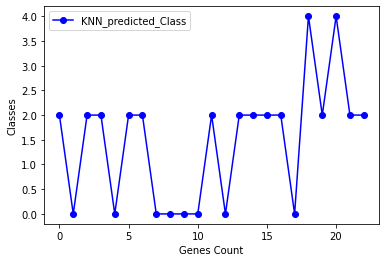

In [111]:
scaled = scaler.fit(pca_data1)
loaded_model = pickle.load(open('Gene_KNN', 'rb'))
scaledX_test = scaled.transform(X_test)
KNN_final_predictions = loaded_model.predict(scaledX_test)

plt.plot(KNN_final_predictions, color = 'blue', label = 'KNN_predicted_Class', marker='o')
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**DT model is loaded and used for predictions on the test data**

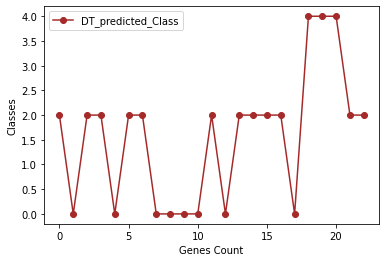

In [112]:
scaled = scaler.fit(pca_data1)
loaded_model = pickle.load(open('Gene_DT', 'rb'))
scaledX_test = scaled.transform(X_test)
DT_final_predictions = loaded_model.predict(scaledX_test)

plt.plot(DT_final_predictions, color = 'brown', label = 'DT_predicted_Class', marker='o')
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**RF model is loaded and used for predictions on the test data**

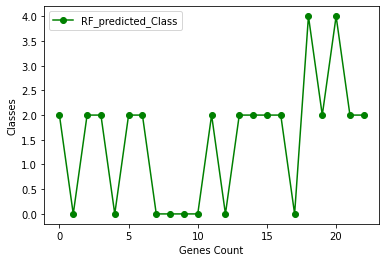

In [113]:
scaled = scaler.fit(pca_data1)
loaded_model = pickle.load(open('Gene_RF', 'rb'))
scaledX_test = scaled.transform(X_test)
RF_final_predictions = loaded_model.predict(scaledX_test)

plt.plot(RF_final_predictions, color = 'green', label = 'RF_predicted_Class', marker='o')
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**GNB model is loaded and used for predictions on the test data**

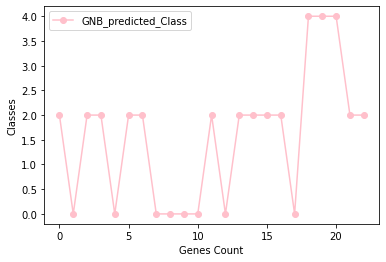

In [122]:
scaled = scaler.fit(pca_data1)
loaded_model = pickle.load(open('Gene_GNB', 'rb'))
scaledX_test = scaled.transform(X_test)
GNB_final_predictions = loaded_model.predict(scaledX_test)

plt.plot(GNB_final_predictions, color = 'pink', label = 'GNB_predicted_Class', marker='o')
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**ADB model is loaded and used for predictions on the test data**

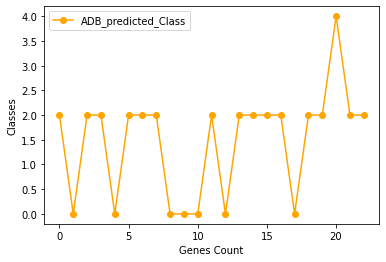

In [123]:
scaled = scaler.fit(pca_data1)
loaded_model = pickle.load(open('Gene_ADB', 'rb'))
scaledX_test = scaled.transform(X_test)
ADB_final_predictions = loaded_model.predict(scaledX_test)

plt.plot(ADB_final_predictions, color = 'orange', label = 'ADB_predicted_Class', marker='o')
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()

**ANN model is loaded and used for predictions on the test data**

1/1 [==============================] - 0s 45ms/step


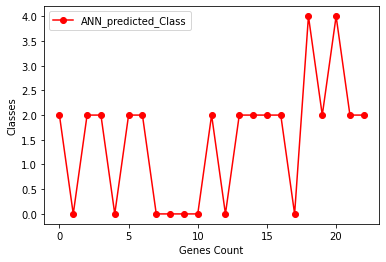

In [116]:
from keras.models import load_model
scaled = scaler.fit(pca_data1)
Ann_Model_path = "/Users/admin/Gene_ANN_Model.h5"
Ann_Model = load_model(Ann_Model_path)
scaledX_test = scaled.transform(X_test)
ANN_final_predictions = Ann_Model.predict(scaledX_test)
ANN_final_predictions = np.argmax(ANN_final_predictions, axis=1)
ANN_final_predictions

plt.plot(ANN_final_predictions, color = 'red', label = 'ANN_predicted_Class', marker='o')
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Genes Count')
plt.ylabel('Classes')
plt.legend(loc='best')#prop={'size':9}
# plt.savefig('CPPM-CPPMT.pdf')
plt.show()


**Writing the predicted class values of all machine learning models employed, to the train dataset for easy comparison with actual class values, and saving to a csv file**

In [108]:
pca_data1['Actual_Class'] = y
pca_data1['ANN_Class'] = ANN_Predictions_all
pca_data1['KNN_Class'] = KNN_predictionsgrid_all
pca_data1['RF_Class'] = RF_predictionsgrid_all
pca_data1['DT_Class'] = DT_predictionsgrid_all
pca_data1['NB_Class'] = GNB_predictionsgrid_all
pca_data1['AdaBoost_Class'] = ADB_predictionsgrid_all

rename = {2:'MED', 0:'EPD',3:'MGL',4:'RHB',1:'JPA'}
pca_data1 = pca_data1.replace(rename)
pca_data1.to_csv('Train_data_predicted.csv', index=False)
pca_data1.head(n=55)

,PCA_1,PCA_2,Actual_Class,ANN_Class,KNN_Class,RF_Class,DT_Class,NB_Class,AdaBoost_Class
0,-32.128838,-27.135726,MED,MED,MED,MED,MED,MED,MED
1,-36.047417,-17.200331,MED,MED,MED,MED,MED,RHB,MED
2,-35.280628,-17.778601,MED,MED,MED,MED,MED,RHB,MED
3,-42.308953,-13.965685,MED,MED,MED,MED,MED,RHB,MED
4,-30.828424,-13.695325,MED,MED,MED,MED,MED,RHB,MED
5,-34.663432,-15.359593,MED,MED,MED,MED,MED,RHB,MED
6,-24.977531,-17.428248,MED,MED,RHB,MED,MED,RHB,MED
7,43.429370,-7.014244,MED,MED,MED,MED,MED,MED,MED
8,35.798744,-1.665207,MED,MED,MED,MED,MED,MED,MED
9,41.318272,-11.908125,MED,MED,MED,MED,MED,MED,MED


**Writing the predicted class values of all machine learning models employed, to the test dataset, and saving to a csv file**

In [110]:
X_test['ANN_Class'] = ANN_final_predictions
X_test['KNN_Class'] = KNN_final_predictions
X_test['RF_Class'] = RF_final_predictions
X_test['DT_Class'] = DT_final_predictions
X_test['NB_Class'] = GNB_final_predictions
X_test['AdaBoost_Class'] = ADB_final_predictions

rename = {2:'MED', 0:'EPD',3:'MGL',4:'RHB',1:'JPA'}
X_test = X_test.replace(rename)
X_test.to_csv('Test_data_predicted.csv', index=False)
X_test.head(n=23)

,PCA_1,PCA_2,ANN_Class,KNN_Class,RF_Class,DT_Class,NB_Class,AdaBoost_Class
0,35.777798,-22.948554,MED,MED,MED,MED,MED,MED
1,-34.352585,12.498766,EPD,EPD,EPD,EPD,EPD,EPD
2,68.520475,48.514499,MED,MED,MED,MED,MED,MED
3,25.592512,-24.053389,MED,MED,MED,MED,MED,MED
4,-33.486813,12.265019,EPD,EPD,EPD,EPD,EPD,EPD
5,53.312485,-21.747785,MED,MED,MED,MED,MED,MED
6,15.534365,-27.765079,MED,MED,MED,MED,MED,MED
7,-23.853960,13.987437,EPD,EPD,EPD,EPD,EPD,RHB
8,-39.834946,9.969558,EPD,EPD,EPD,EPD,EPD,EPD
9,-33.853482,15.450010,EPD,EPD,EPD,EPD,EPD,EPD


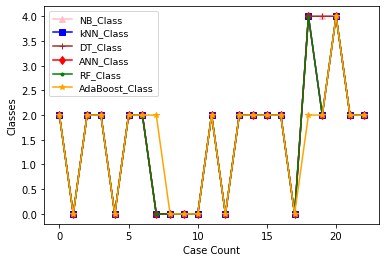

In [128]:
plt.plot(GNB_final_predictions, color = 'pink', label = 'NB_Class', marker='^' )
plt.plot(KNN_final_predictions, color = 'blue', label = 'kNN_Class', marker='s' )
plt.plot(DT_final_predictions, color = 'brown', label = 'DT_Class', marker='+' )
plt.plot(ANN_final_predictions, color = 'red', label = 'ANN_Class', marker='d' )
plt.plot(RF_final_predictions, color = 'green', label = 'RF_Class', marker='.' )
plt.plot(ADB_final_predictions, color = 'orange', label = 'AdaBoost_Class', marker='*' )
#plt.title('Calculated Neutron Deficient Nuclei Half-life with Qexpt')
plt.xlabel('Case Count')
plt.ylabel('Classes')
plt.legend(loc='upper left',prop={'size':9.5})
plt.savefig('Gene_test.pdf')
plt.show()

# Thank you ✌️😉